# **Bank Customer Churn Prediction**

## **Introduction**

The bank customer churn dataset serves as a valuable resource for analyzing customer retention in the banking industry. It contains detailed information about customers, including unique identifiers, demographics such as age and gender, financial metrics like credit score and account balance, and engagement indicators like tenure and product usage. The dataset categorizes customers based on their status (whether they have remained with the bank or exited) making it ideal for predictive modeling and understanding the factors influencing customer churn. By leveraging this data, businesses can enhance customer retention strategies and improve overall service quality.




---



## **Importing Libraries**

In [1]:
# Data manipulation and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

# Data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Machine Learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Plotting confusion matrix and ROC curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Display settings for pandas
pd.set_option('display.max_columns', None)

# Warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output




---



## **Loading Data**

**For more information about the data [here](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data)**

In [2]:
# download data from kaggle
!kaggle datasets download -d shubhammeshram579/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
License(s): CC0-1.0
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 51.7MB/s]


In [3]:
# unzip data
!unzip bank-customer-churn-prediction.zip

Archive:  bank-customer-churn-prediction.zip
  inflating: Churn_Modelling.csv     


In [5]:
# read data
bank_df = pd.read_csv('Churn_Modelling.csv')

# first 10 rows
bank_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


Based on the initial examination of the first 10 rows of the dataset, several observations can be made:

1. **Null Values**: The dataset contains missing values in some columns, which need to be addressed during data preprocessing.

2. **Inconsistent Data**: For the first customer, there is a contradiction where the customer is marked as an active member while simultaneously being classified as having exited the bank, with a zero account balance. This inconsistency requires further investigation.

3. **Potentially Redundant Columns**: The dataset includes two columns, `RowNumber` and `CustomerId`, which may not be necessary for analysis. It is important to check whether the `CustomerId` column contains unique values, as this will determine its relevance.

4. **Surname Column Analysis**: The `Surname` column should be evaluated to assess its potential usefulness in the machine learning model. It may be more relevant for exploratory data analysis (EDA) rather than for predictive modeling.

These points will guide our data cleaning and preparation steps moving forward.




---



## **Exploratory Data Analysis (EDA)**

In this section, we will perform an in-depth exploration of the data, aiming to uncover patterns, trends, and unusual behaviors. By conducting thorough exploratory data analysis (EDA), we can better understand the underlying structure of the dataset, identify potential anomalies, and gain valuable insights into the behavior of bank customers. This process will help us detect outliers, unusual patterns, and any unexpected relationships in the data, which are crucial for improving the performance of the classification model. Through this analysis, we aim to build a stronger foundation for making informed decisions and optimizing the classification process.

In [ ]:
# data info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


It seems that we have **Only One** null values in 'Geography', 'Age', HasCrCard' and 'IsActiveMember' columns.

In [ ]:
# rows with null values
bank_df[bank_df.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


### Handling Missing & Duplicated Data:
Since there are only 4 rows with null values in the entire dataset, I will proceed by dropping these rows to ensure data integrity without significantly impacting the dataset's overall size.


In [6]:
# drop rows with null values
bank_df.dropna(inplace=True)

In [7]:
# check duplicated rows
bank_df.duplicated().sum()

2

In [8]:
# drop duplicated row
bank_df.drop_duplicates(inplace=True)

In [ ]:
# data shape
bank_df.shape

(9996, 14)

In [ ]:
# check unique values of columns
unique_values_df = pd.DataFrame({
    'Column': bank_df.columns,
    'Unique Values': [bank_df[col].unique() for col in bank_df.columns],
    'No. of Unique Values': [bank_df[col].nunique() for col in bank_df.columns]
})

# Display the DataFrame in a well-formatted way
unique_values_df

,Column,Unique Values,No. of Unique Values
0,RowNumber,"[1, 2, 3, 4, 6, 8, 11, 12, 13, 14, 15, 16, 17,...",9996
1,CustomerId,"[15634602, 15647311, 15619304, 15701354, 15574...",9996
2,Surname,"[Hargrave, Hill, Onio, Boni, Chu, Obinna, Bear...",2932
3,CreditScore,"[619, 608, 502, 699, 645, 376, 528, 497, 476, ...",460
4,Geography,"[France, Spain, Germany]",3
5,Gender,"[Female, Male]",2
6,Age,"[42.0, 41.0, 39.0, 44.0, 29.0, 31.0, 24.0, 34....",73
7,Tenure,"[2, 1, 8, 4, 6, 3, 10, 5, 7, 9, 0]",11
8,Balance,"[0.0, 83807.86, 159660.8, 113755.78, 115046.74...",6379
9,NumOfProducts,"[1, 3, 2, 4]",4


### Unique Values Observations:
After examining the unique values in the dataset, we found that both the `RowNumber` and `CustomerId` columns contain entirely unique values for each row. Since these columns don't provide any meaningful information for predicting customer behavior, they will be dropped from the dataset before modeling.

Additionally, while the `Surname` column contains non-unique values, further exploration is needed to determine if it contributes to the predictive power of the model. We will keep it for now and investigate its relevance during the feature selection process.

In [ ]:
# describe data
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5002.497899,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,2885.744618,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2503.750000,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5002.500000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,7501.250000,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Data Description Observations:
Based on the data description, there are no obvious outliers in the dataset's columns. However, one notable observation is the imbalance in the `Exited` column, which indicates the target variable. This imbalance will be further investigated and visualized to assess its impact on the model's performance and determine if any resampling techniques are needed.


### Data Visualization

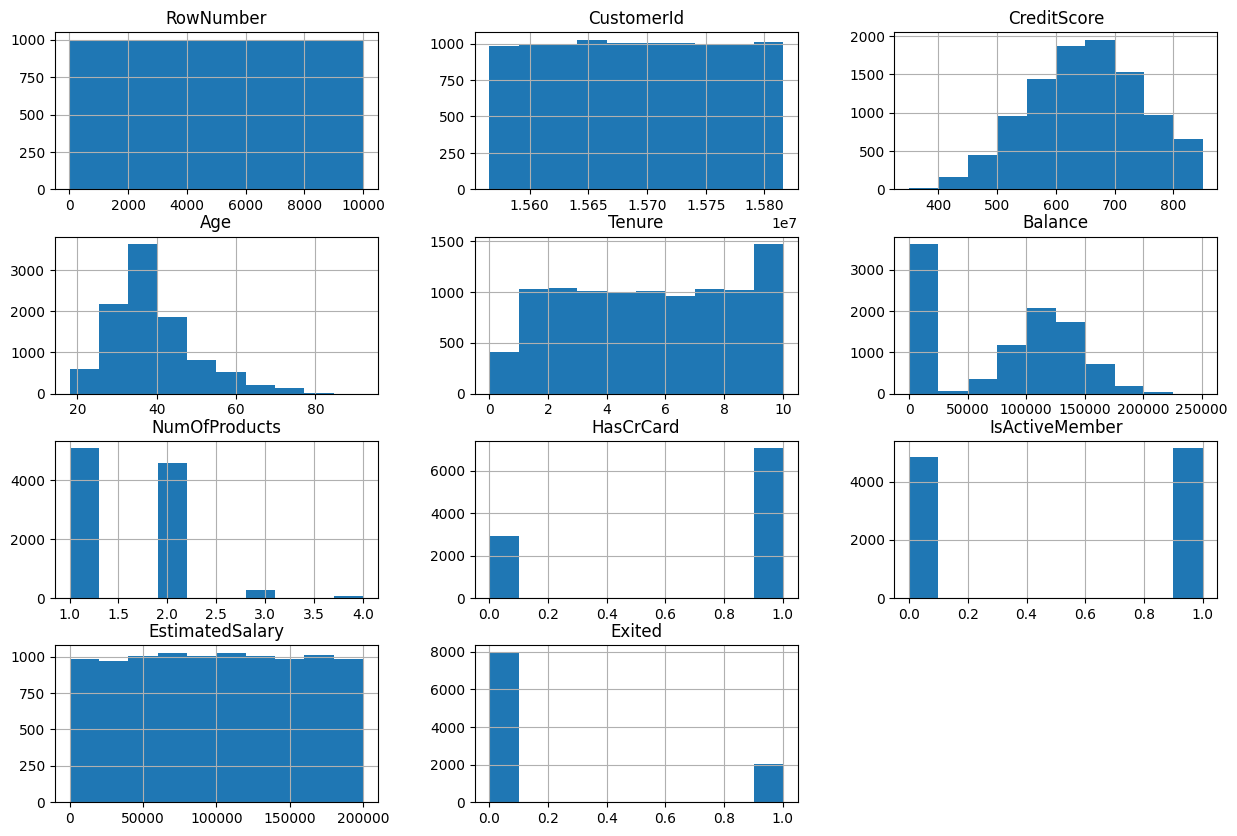

In [ ]:
# data hist plot
bank_df.hist(figsize=(15, 10))
plt.show()

#### Key Observations from Data Histograms:

Two clear observations emerged from the data histogram plots:

- **'Balance' Column**: There is a high frequency of zero values in the `Balance` column, which stands out as unusual. This was already noted during the review of the first 10 rows of data. Further investigation is required to understand why so many customers have a zero balance and how this correlates with other features.

- **'Exited' Column Imbalance**: The target variable, `Exited`, shows a significant class imbalance. Around 80% of the data represents customers who stayed (1), while only 20% exited (0). This imbalance needs to be addressed, potentially using techniques such as resampling, to ensure a balanced and accurate model.


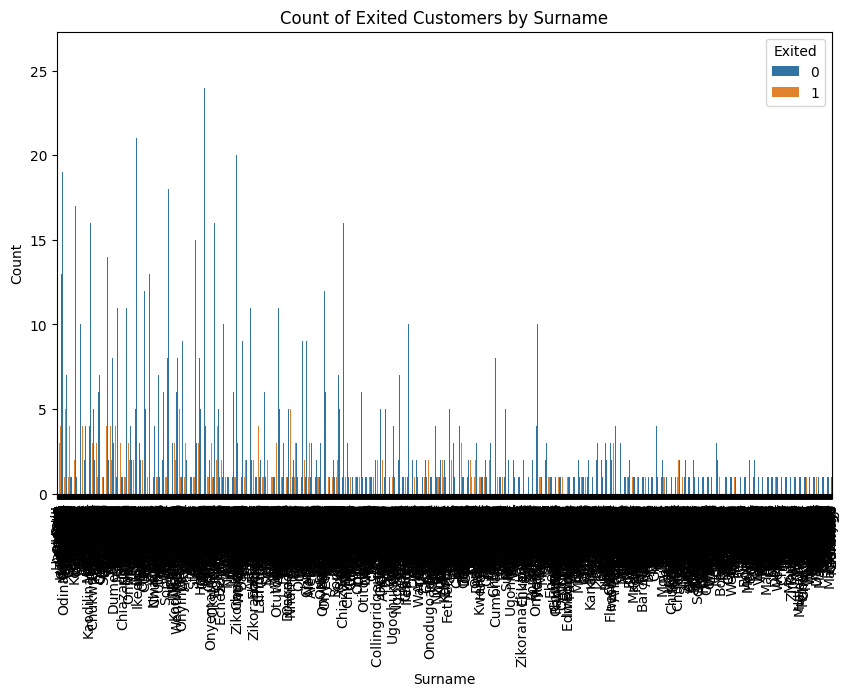

In [ ]:
# countplot for 'Surname' with 'Exited' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='Surname', hue='Exited')
plt.xticks(rotation=90)
plt.xlabel('Surname')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Surname')
plt.show()

#### Insights from 'Surname' Countplot:

After reviewing the `Surname` countplot, no significant patterns or attractive behavior were observed. As a result, the `Surname` column will be dropped from the dataset before modeling and will not be included in any further visualizations.


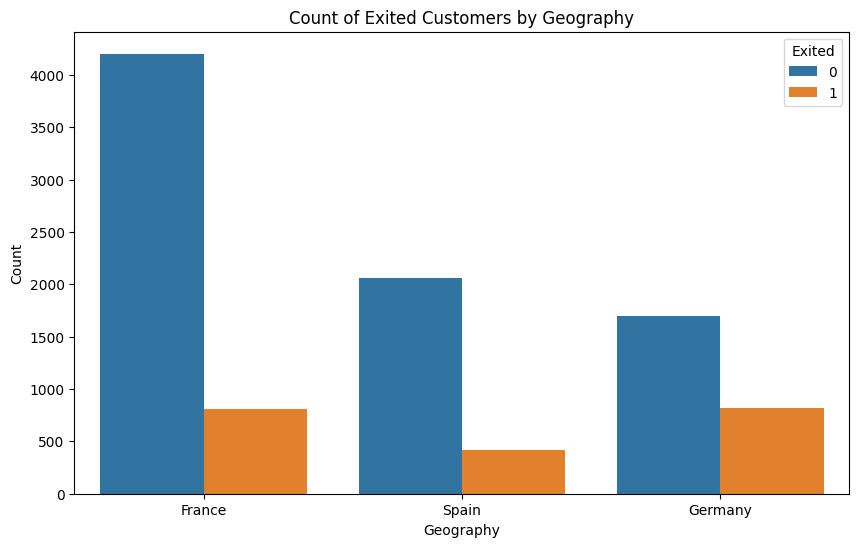

In [ ]:
# countplot for 'Geography' with 'Exited' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='Geography', hue='Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Geography')
plt.show()

#### Insights from 'Geography' Countplot:

The `Geography` countplot highlights a noticeable imbalance in the `Exited` column across different regions. This imbalance is particularly evident in **France** and **Spain**, where a significant portion of customers did not exit, while **Germany** shows a slightly more balanced distribution. These regional differences in customer behavior may provide valuable insights for the model and warrant further investigation.


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

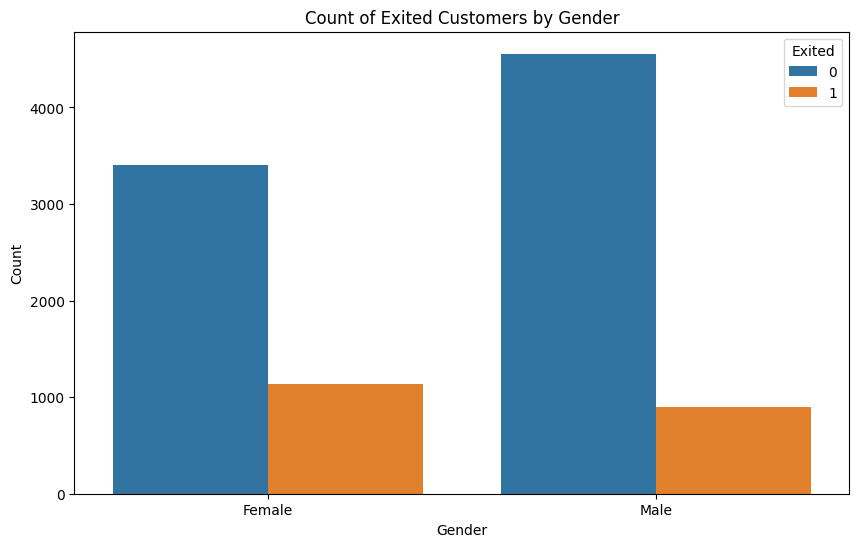

In [ ]:
# countplot for 'Gender' with 'Exited' as hue
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='Gender', hue='Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Gender')
plt

#### Insights from 'Gender' Countplot:

The `Gender` countplot reveals that females tend to exit at a slightly higher rate than males. However, the difference is not substantial enough to warrant further investigation or to categorize it as a definitive behavioral trend. This observation suggests that while gender may play a role, it is not a primary factor influencing exit behavior in this dataset.


In [ ]:
# scatter CreditScore vs EstimatedSalary
px.scatter(bank_df, x='CreditScore', y='EstimatedSalary', color='Exited')


#### Analysis of CreditScore vs EstimatedSalary Scatter Plot:

The scatter plot comparing `CreditScore` and `EstimatedSalary` does not reveal any obvious patterns or trends. The data points appear to be randomly distributed among exited customers, indicating that there is no significant relationship between these two variables in relation to customer exits. Therefore, no further action is required based on this analysis.


In [ ]:
# scatter CreditScore vs Balance
px.scatter(bank_df, x='CreditScore', y='Balance', color='Exited')

#### Analysis of CreditScore vs Balance Scatter Plot:

Similar to the patterns observed in the relationship between CreditScore and EstimatedSalary, the plot comparing CreditScore and Balance does not reveal any clear pattern or trend among the customers. This indicates that there is no obvious correlation between these variables based on the available data.


In [ ]:
# scatter Age vs Tenure
px.scatter(bank_df, x='Age', y='Tenure', color='Exited')

#### Analysis of Age vs Tenure Scatter Plot:

The scatter plot comparing Age and Tenure reveals that the majority of leaved customers are around the age of 50. Additionally, Tenure does not appear to have a significant impact on customer retention, as no strong relationship or trend is observed between the two variables.




For more obvious visualization, i'll creare 'Age_group' column for 'Age' intervals and plot it.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

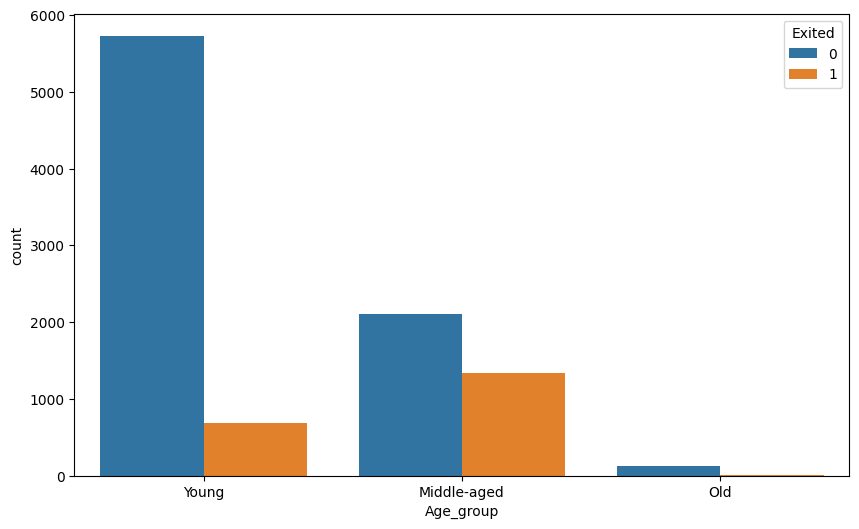

In [9]:
# create 'Age_group' column by cut 'Age' column
bank_df['Age_group'] = pd.cut(bank_df['Age'], bins=[0,40,70,100], labels=['Young', 'Middle-aged', 'Old'])

# countplot for 'Age_group'
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='Age_group', hue='Exited')
plt

#### Analysis of Age_group Count Plot:

The count plot for the 'Age_group' variable supports the previous observation, confirming that the majority of leaved customers fall within the age range of 40 to 70. This range represents the most active age interval among the customer base.


Text(0.5, 1.0, 'Has Credit Card by Number of Products')

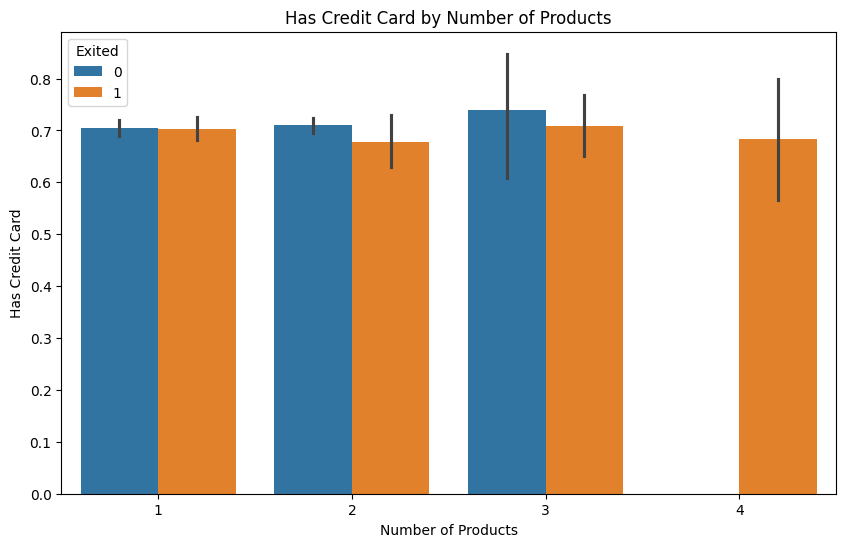

In [ ]:
# HasCrCard vs NumOfProducts
plt.figure(figsize=(10, 6))
sns.barplot(data=bank_df, x='NumOfProducts', y='HasCrCard', hue='Exited')
plt.xlabel('Number of Products')
plt.ylabel('Has Credit Card')
plt.title('Has Credit Card by Number of Products')

#### Analysisof HasCrCard vs NumOfProducts Bar Plot:

The bar plot comparing 'HasCrCard' and 'NumOfProducts' indicates that these two features generally have no significant impact on customers. However, an exception is observed for customers using 4 products, as all of them had leaved the bank, which may indicate not enough level of services for high class customers leading to make more attention in future. For all other categories, no clear effect is evident on customer retention.


Text(0.5, 1.0, 'Count of Exited Customers by Is Active Member')

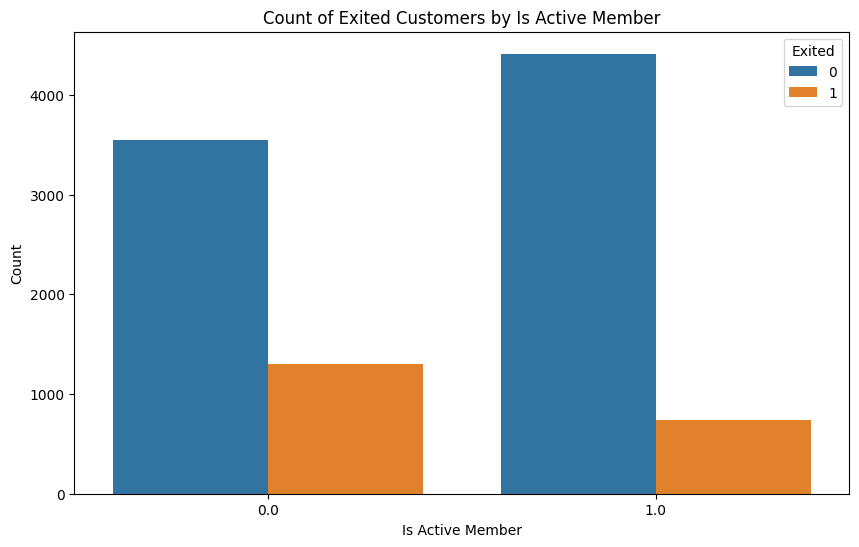

In [ ]:
# count plot for 'IsActiveMember'
plt.figure(figsize=(10, 6))
sns.countplot(data=bank_df, x='IsActiveMember', hue='Exited')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Is Active Member')

#### Analysis of IsActiveMember Count Plot:

The count plot for 'IsActiveMember' reveals that leaved customers from both inactive and active members not far. This suggests that the presence of many inactive members may be due to personal reasons rather than attraction to the bank’s services. This finding indicates that more attention should be given to enhancing and promoting the bank’s offerings to engage customers more effectively.


### **Observations Summary from EDA:**

- The `RowNumber` and `CustomerId` columns contain unique values and provide no predictive power, so they will be dropped. The `Surname` column shows no significant impact and will also be removed.

- The `Exited` column shows a significant class imbalance, with 80% of customers staying. Resampling techniques may be required to address this imbalance.

- The `Balance` column has a high frequency of zero values, which requires further investigation.

- The `Geography` column shows regional imbalances in exit behavior, particularly in France and Spain. Gender does not significantly influence exit rates.

- No clear patterns are observed in `CreditScore` vs `EstimatedSalary`, `CreditScore` vs `Balance`, or `Age` vs `Tenure`.

- Most leaved customers are aged 40 to 70, and `HasCrCard` and `NumOfProducts` show little impact, except for customers with 4 products who are all exited the bank, suggesting more attention for high class customers.

- Leaved Inactive and active members not far, suggesting that bank services need improvement to engage customers.




---



## **Data Cleaning**

After dropping the 4 rows with null values and identifying no obvious outliers from the data description, this section will focus on the following tasks:
- Dropping unnecessary columns such as `RowNumber`, `CustomerId`, `Age_group`, and `Surname` from the dataset.
- Further exploration of the existence of outliers and addressing them if necessary.
- Investigating the unusual occurrence of 0 values in the `Balance` column.
- Visualize data relations.


### Dropping Unnecessary Columns:

In [10]:
# drop unnecessary columns
bank_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Age_group'], axis=1, inplace=True)

### Outliers:

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# numeric columns
num_cols = bank_df.select_dtypes(include=['number']).columns

# Columns to explore
to_explore = [col for col in num_cols if col not in ['Exited']]

for column in to_explore:
    # Calculate Q1, Q3, and IQR
    Q1 = bank_df[column].quantile(0.25)
    Q3 = bank_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = bank_df[(bank_df[column] < lower_bound) | (bank_df[column] > upper_bound)]
    outlier_count = len(outliers)

    # Create subplots: 1 row, 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f'{column} - Boxplot', f'{column} - Distplot'))

    # Boxplot
    fig.add_trace(go.Box(
        y=bank_df[column],
        name='Boxplot',
        boxmean='sd'
    ), row=1, col=1)

    # Distplot (Density Plot)
    fig.add_trace(go.Histogram(
        x=bank_df[column],
        name='Distplot',
        histnorm='probability density',
        nbinsx=30,
        opacity=0.6,
        marker_color='skyblue'
    ), row=1, col=2)

    # Add annotations to Boxplot
    fig.add_annotation(
        x=1,  # Center of the boxplot
        y=bank_df[column].max(),
        text=f'No Outliers: {outlier_count}',
        showarrow=False,
        arrowhead=2,
        ax=0,
        ay=-50,
        xref='x1',
        yref='y1'
    )

    # Update layout
    fig.update_layout(
        title=f'Interactive Plot for {column}',
        xaxis_title='Values',
        yaxis_title='Density',
        xaxis2_title='Values',
        yaxis2_title='Density',
        height=600,
        width=1000,
        showlegend=False
    )

    # Show plot
    fig.show()


#### Outlier Treatment:

For the analysis of outliers:
- The `CreditScore` values do not exhibit significant outliers, as they are not far from the overall distribution; therefore, no action is needed.
- In the `NumOfProducts` column, a value of 4 is not considered an outlier despite its low frequency.
- For the `Age` column, since the class from 70 to 100 has minimal contribution to the dataset, any age value greater than 70 will be capped at 70.


In [11]:
# assign value of 70 to any higher 'Age' value
bank_df.loc[bank_df['Age'] > 70, 'Age'] = 70

### Investigating Unusual 'Balance' zero value:

In [12]:
# group the customers with zero balance according to 'IsActiveMember' and 'Exited'
zero_balance_df = bank_df[bank_df['Balance'] == 0].groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
zero_balance_df

,IsActiveMember,Exited,Count
0,0.0,0,1424
1,0.0,1,320
2,1.0,0,1692
3,1.0,1,180


### Conclusion on Zero Balances:
The zero_balance_df indicates that the number of customers with a zero balance is evenly split between active and inactive statuses. This suggests that while some customers are still engaging in transactions that result in a zero balance, others may be inactive, potentially reflecting a lack of interest in the bank's services or underlying issues with customer satisfaction.

Given this balance, the presence of zero balance customers no longer appears unusual. However, the equal distribution between active and inactive customers highlights a potential area for the bank to improve services and customer engagement strategies. No further actions will be taken regarding these cases at this time.

### Visualize data relations:

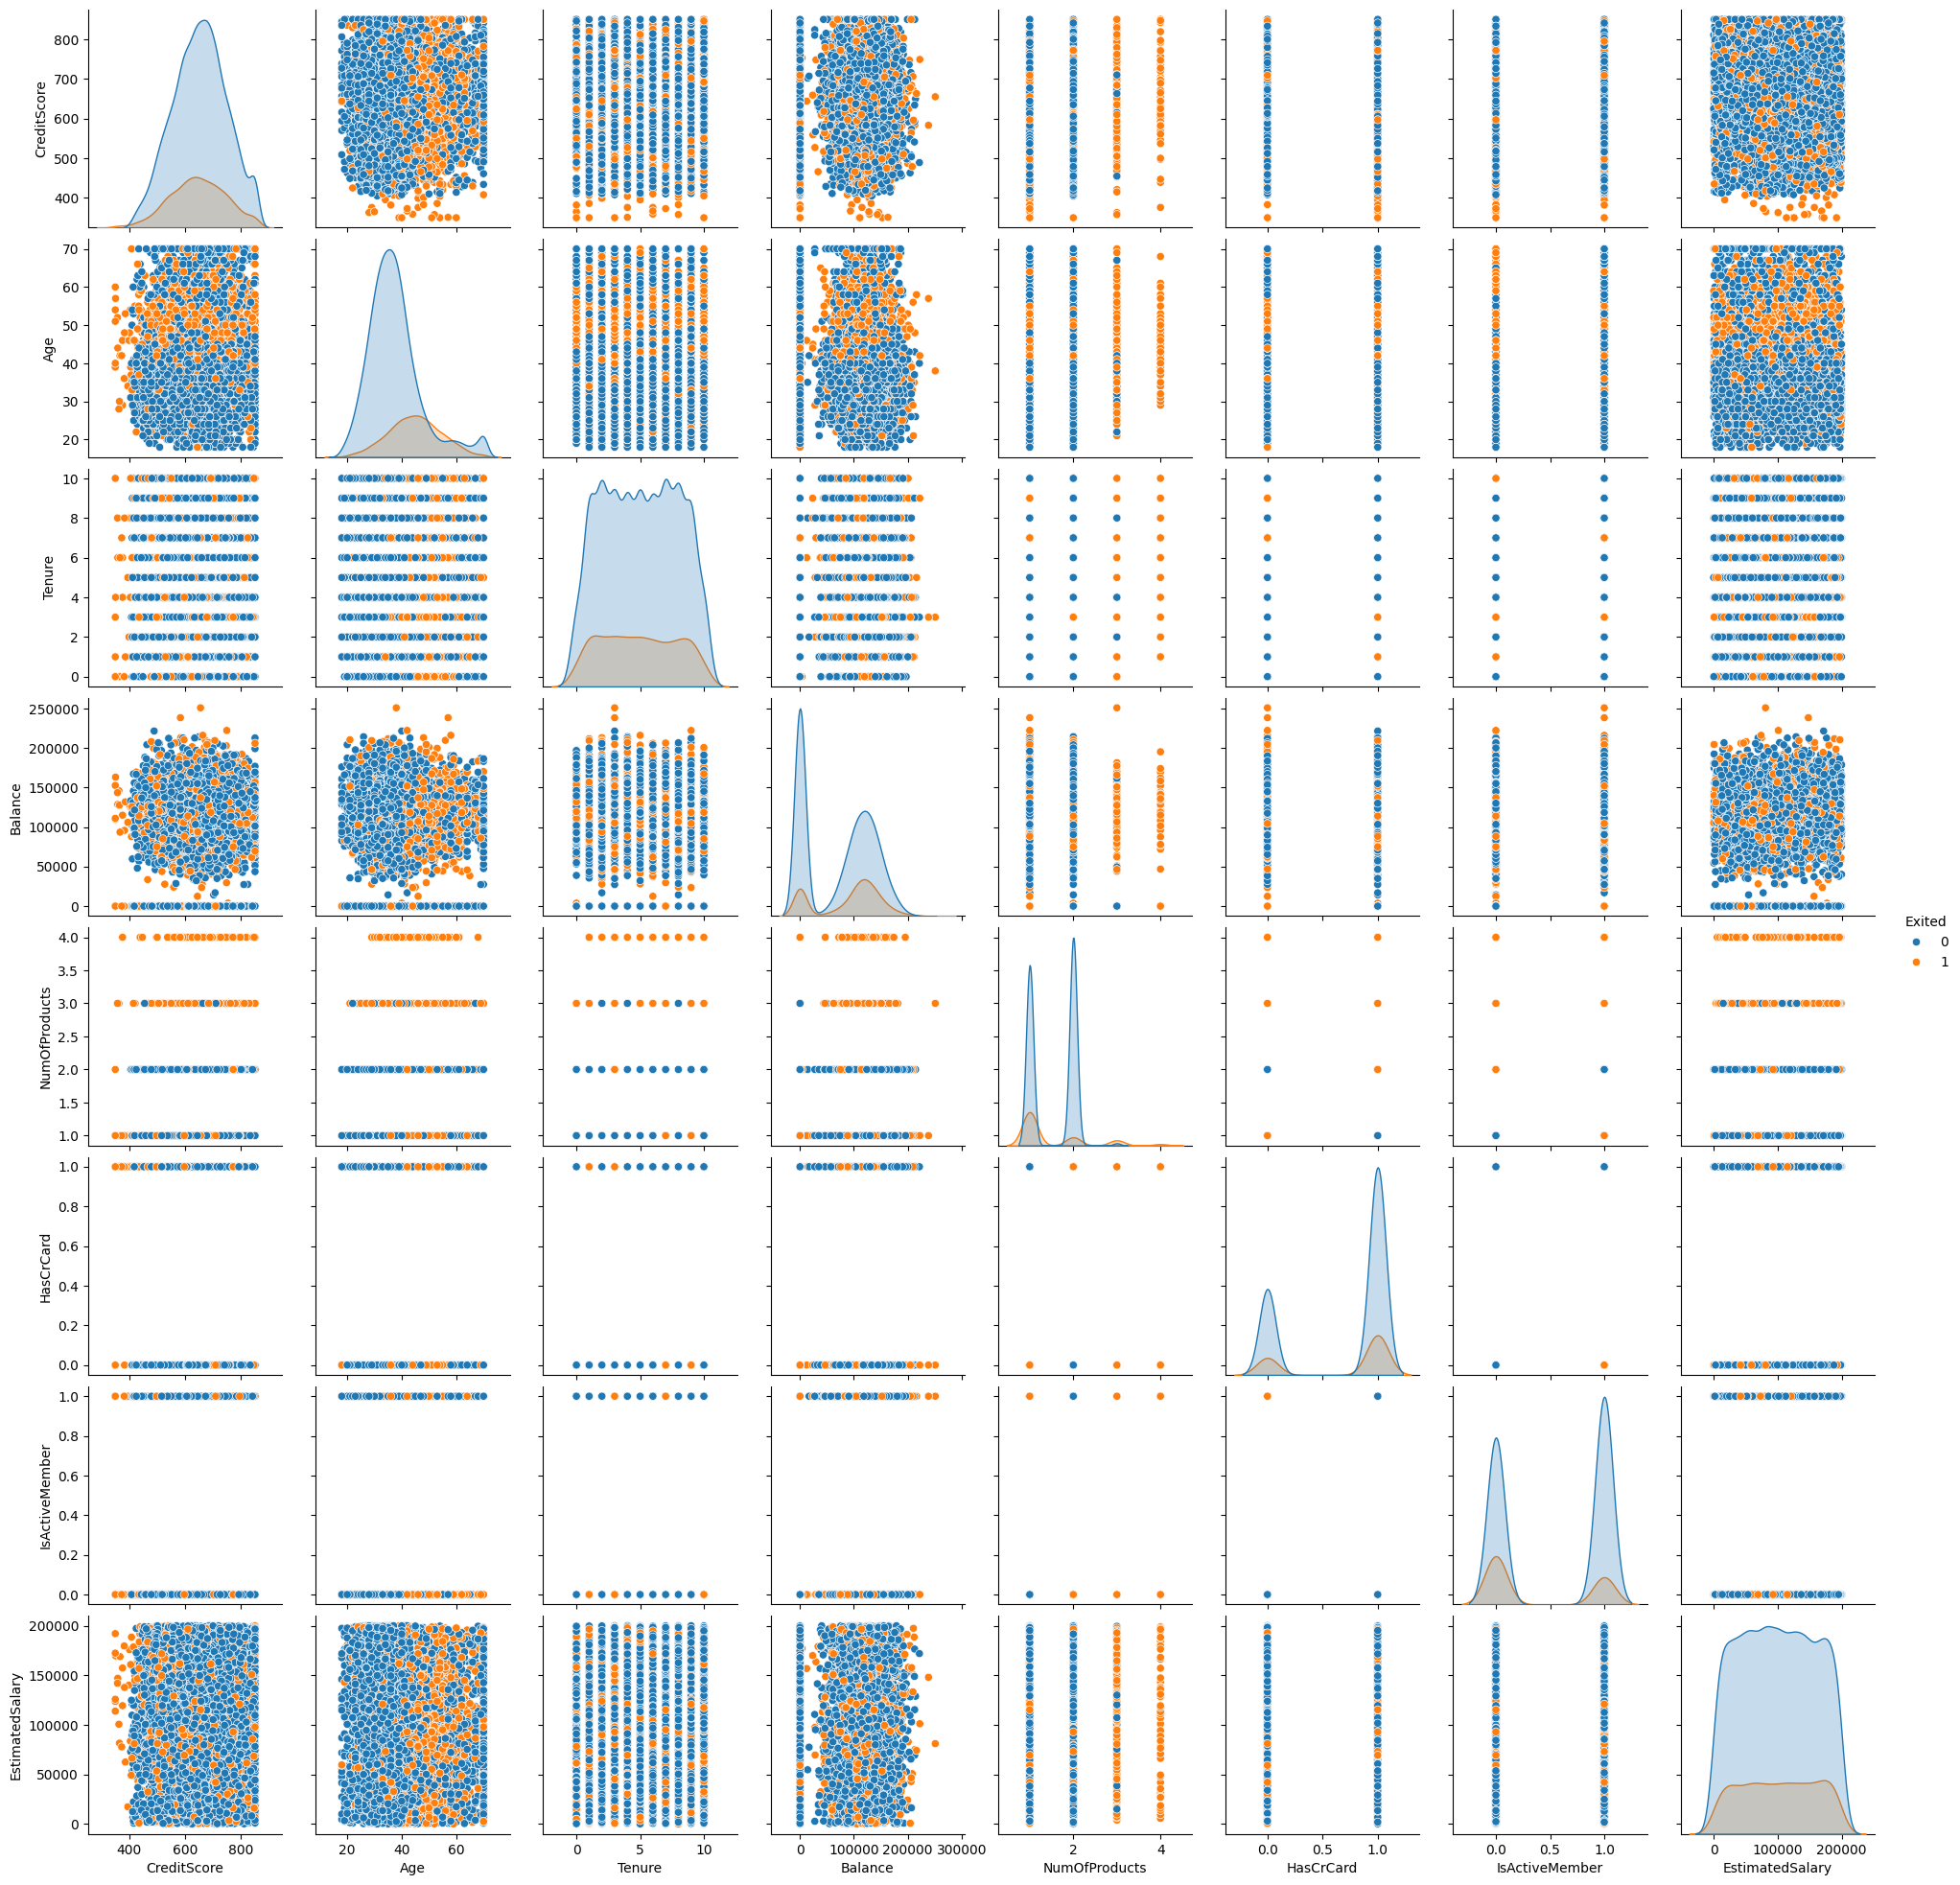

In [ ]:
# data pair plot
sns.pairplot(bank_df, hue='Exited')

From the pair plot, no obvious relation between features.

<Axes: >

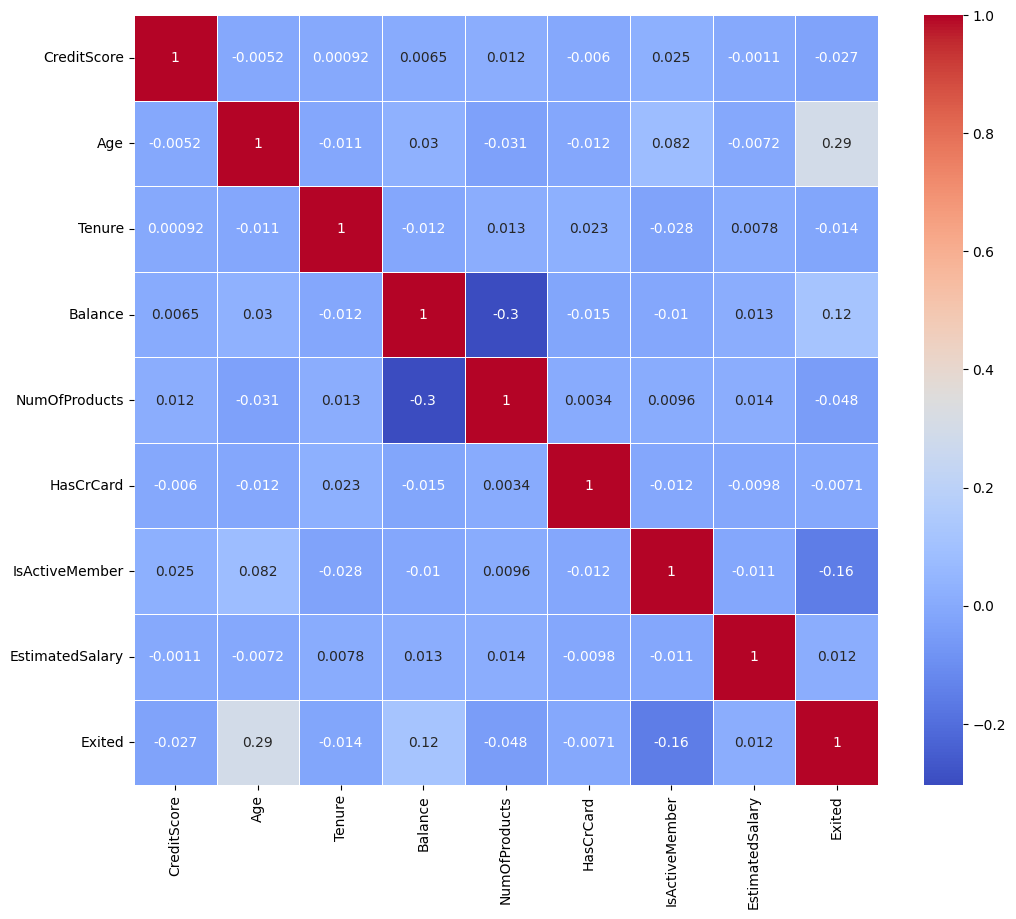

In [ ]:
# data correlation
corr_matrix = bank_df[bank_df.select_dtypes(include='number').columns].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)



---



## **Feature Engineering**

In this section, we apply feature engineering techniques to create new features based on existing columns in the dataset. These engineered features will help to capture more meaningful relationships in the data and improve model performance.

1. Grouping Zero Balance Customers:
   - Group customers with a zero balance based on their 'IsActiveMember' and 'Exited' status.
   - Modify 'IsActiveMember' to 0 for customers with a zero balance and who have exited.

2. Active Level Grouping:
   - Group customers by the number of products they own, credit card ownership, and activity level ('IsActiveMember').
   - Set 'IsActiveMember' and 'HasCrCard' to 0 for customers who have exited.

3. Feature Creation:
   - Create new features such as `total_active`, which is the sum of 'IsActiveMember', 'NumOfProducts', and 'HasCrCard'.
   - Add `Balance_to_Salary`, representing the ratio of balance to estimated salary.
   - Calculate `Tenure_to_Age`, expressing the relationship between tenure and age.
   - Introduce interaction features such as `Balance_Age_Interaction` and `Products_Age_Interaction` to capture combined effects.
   - Compute `Balance_to_Age` and `Balance_to_Products`, representing the ratio of balance to age and number of products respectively.


### Grouping Zero Balance Customers:

In [ ]:
# group the customers with zero balance according to 'IsActiveMember' and 'Exited'
zero_balance_df = bank_df[bank_df['Balance'] == 0].groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
zero_balance_df

,IsActiveMember,Exited,Count
0,0.0,0,1424
1,0.0,1,320
2,1.0,0,1692
3,1.0,1,180


This shows a conflict. How a member to Exit and still being an active member (180 member).

So, i'll change these members to be inactive

In [13]:
# change 0 Balance and 1 Exited members IsActiveMember to 0
bank_df.loc[(bank_df['Balance'] == 0) & (bank_df['Exited'] == 1) & (bank_df['IsActiveMember'] == 1), 'IsActiveMember'] = 0

### Active Level Grouping:

In [14]:
# group df according to NumOfProducts, HasCrCard, IsActiveMember
active_level_df = bank_df.groupby([ 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']).size()
active_level_df

NumOfProducts  HasCrCard  IsActiveMember  Exited
1              0.0        0.0             0          470
                                          1          291
                          1.0             0          618
                                          1          127
               1.0        0.0             0         1127
                                          1          748
                          1.0             0         1458
                                          1          243
2              0.0        0.0             0          567
                                          1           76
                          1.0             0          664
                                          1           36
               1.0        0.0             0         1365
                                          1          167
                          1.0             0         1644
                                          1           69
3              0.0        0.0             0            4
                                          1           45
                          1.0             0            8
                                          1           19
               1.0        0.0             0           14
                                          1          116
                          1.0             0           20
                                          1           40
4              0.0        0.0             1           11
                          1.0             1            8
               1.0        0.0             1           28
                          1.0             1           13
dtype: int64

It seems weired that some customers that exited the bank still recorded as active members and have credit card.

I'll change any exited member to inactive and has no credit card.

In [15]:
# change any exited member to IsActiveMember 0 and HasCrCard 0
bank_df.loc[(bank_df['Exited'] == 1) & (bank_df['IsActiveMember'] == 1), 'IsActiveMember'] = 0
bank_df.loc[(bank_df['Exited'] == 1) & (bank_df['HasCrCard'] == 1), 'HasCrCard'] = 0

### Feature Creation:

In [16]:
# create total_active column
bank_df['total_active'] = bank_df['IsActiveMember'] + bank_df['NumOfProducts'] + bank_df['HasCrCard']

#  balance to salary
bank_df['Balance_to_Salary'] = bank_df['Balance'] / bank_df['EstimatedSalary']

# create tenure to age column
bank_df['Tenure_to_Age'] = bank_df['Tenure'] / bank_df['Age']

# balance age interaction
bank_df['Balance_Age_Interaction'] = bank_df['Balance'] * bank_df['Age']

# product age interaction
bank_df['Products_Age_Interaction'] = bank_df['NumOfProducts'] * bank_df['Age']

# balance age ratio
bank_df['Balance_to_Age'] = bank_df['Balance'] / bank_df['Age']

# balance product ratio
bank_df['Balance_to_Products'] = bank_df['Balance'] / bank_df['NumOfProducts']




---



## **Data Preprocessing**

In this section, we will perform the following tasks:
- Encoding categorical features as needed.
- Splitting data.
- Normalizing features to ensure they are on a similar scale.



### Encoding:

Since all categorical features are nominal and do not have any inherent order, I will use One-Hot Encoding to handle them appropriately.


In [17]:
# encode categorical features
cat_cols = ['Geography', 'Gender']
bank_df_encoded = pd.get_dummies(bank_df, columns=cat_cols, drop_first=False)

In [18]:
# transform bool columns to int
bool_cols = bank_df_encoded.select_dtypes(include=['bool']).columns
bank_df_encoded[bool_cols] = bank_df_encoded[bool_cols].astype(int)

### Splitting Data:

In [19]:
# split data to X, y
X = bank_df_encoded.drop('Exited', axis=1)
y = bank_df_encoded['Exited']

# split data to train and test with proportions according to 'Exited' column due to imbalance in data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Normalization:

In [20]:
# normalize features using MinMax
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)



---



## **Classification Modelling**

In the classification modeling phase of this project, we will evaluate various machine learning algorithms, including `Logistic Regression`, `K-Nearest Neighbors (KNN)`, `Decision Tree`, `Support Vector Machine (SVM)`, `Random Forest`, and `XGBoost`, to identify the most effective model. Using 5-fold cross-validation, we will focus on the F1 score as our primary performance metric, as it balances precision and recall, particularly for imbalanced datasets. The model that demonstrates the best initial performance will undergo hyperparameter tuning via `GridSearchCV` to further enhance its efficacy, and we will assess F1 scores on both training and test datasets to ensure robust generalization.


In [21]:
# define models function
def models_cv(train_X, test_X, train_y, test_y):
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(),
            'params': {
                'C': [0.1, 1, 10],
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Support Vector Machine': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [3, 5, 10]
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2],
                'n_estimators': [50, 100, 200]
            }
        }
    }

    # List to store results
    results = []

    for name, model_info in models.items():
        model = model_info['model']
        param_dist = model_info['params']

        # Set up RandomizedSearchCV with 5-fold cross-validation and F1 score as the scoring metric
        random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='f1', n_jobs=-1)

        # Perform random search on the training data
        random_search.fit(train_X, train_y)

        # Get the best model after random search
        best_model = random_search.best_estimator_

        # Print the best parameters found for the model
        print(name + ' Best Parameters:', random_search.best_params_)

        # Training predictions and evaluation metrics
        train_predictions = best_model.predict(train_X)
        train_f1 = f1_score(train_y, train_predictions)
        train_precision = precision_score(train_y, train_predictions)
        train_recall = recall_score(train_y, train_predictions)

        # Test predictions and evaluation metrics
        test_predictions = best_model.predict(test_X)
        test_f1 = f1_score(test_y, test_predictions)
        test_precision = precision_score(test_y, test_predictions)
        test_recall = recall_score(test_y, test_predictions)

        # Store results
        results.append({
            'Model': name,
            'Best Parameters': random_search.best_params_,
            'Train F1': train_f1,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Test F1': test_f1,
            'Test Precision': test_precision,
            'Test Recall': test_recall
        })


    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    return results_df


In [ ]:
# call models_cv
models_cv(train_X, test_X, train_y, test_y)

Logistic Regression Best Parameters: {'solver': 'lbfgs', 'C': 0.1}
K-Nearest Neighbors Best Parameters: {'weights': 'distance', 'n_neighbors': 7}
Decision Tree Best Parameters: {'min_samples_split': 10, 'max_depth': 5}
Support Vector Machine Best Parameters: {'kernel': 'rbf', 'C': 10}
Random Forest Best Parameters: {'n_estimators': 100, 'max_depth': 10}
XGBoost Best Parameters: {'n_estimators': 50, 'learning_rate': 0.1}


,Model,Best Parameters,Train F1,Train Precision,Train Recall,Test F1,Test Precision,Test Recall
0,Logistic Regression,"{'solver': 'lbfgs', 'C': 0.1}",0.821728,0.776201,0.872928,0.811628,0.772124,0.855392
1,K-Nearest Neighbors,"{'weights': 'distance', 'n_neighbors': 7}",1.000000,1.000000,1.000000,0.820388,0.812500,0.828431
2,Decision Tree,"{'min_samples_split': 10, 'max_depth': 5}",0.862193,0.842013,0.883364,0.853688,0.842482,0.865196
3,Support Vector Machine,"{'kernel': 'rbf', 'C': 10}",0.874366,0.850755,0.899325,0.851270,0.840095,0.862745
4,Random Forest,"{'n_estimators': 100, 'max_depth': 10}",0.915493,0.913256,0.917741,0.847747,0.842615,0.852941
5,XGBoost,"{'n_estimators': 50, 'learning_rate': 0.1}",0.883328,0.867891,0.899325,0.856454,0.843230,0.870098


### Models Conclusion
The results show that K-Nearest Neighbors (KNN) achieved perfect scores on the training set but had lower generalization performance on the test set (F1: 0.820), indicating potential overfitting. Random Forest and XGBoost performed well overall, with Random Forest having the highest training F1 (0.915) but slightly lower test F1 (0.848), while XGBoost showed balanced performance (Test F1: 0.856). Logistic Regression, Decision Tree, and Support Vector Machine (SVM) also had good performance, with SVM and Decision Tree showing consistent results across both training and test sets, making them solid options. Overall, we will prefer Decision Tree as giving accepted results and less time comparing to Random Forest and XGB.



---



## **Conclusion**

This project provided valuable insights into customer churn behavior within the banking sector by thoroughly analyzing the bank customer churn dataset. Through Exploratory Data Analysis (EDA), we identified key factors influencing customer retention, such as age, balance, and product usage. Feature engineering allowed us to create meaningful features that captured deeper relationships within the data, while data preprocessing ensured that the dataset was ready for classification modeling. By evaluating various machine learning models, we were able to identify the most effective approach to predicting customer churn, with a particular focus on optimizing for class imbalance. These results can help banks develop more targeted strategies to retain high-value customers and enhance overall customer satisfaction.




---

